# Project: No-Show Appointments Analysis
## By Michaela Wonacott

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. That data recorded for each patient (represented by column names) is their patient and appointment IDs,	gender,	day scheduled the appointment, day of the appointment, age, neighbourhood. In addition, it was noted whether or not the patient had a scholarship, hypertension, diabetes, alcoholism, handicap, recieved an SMS, and if they were a no-show to the appoinment.

In this project, we will be analyzing the data collected of patients in correlation with not showing up to appointments. In particaular, we will be interested in finding trends among patients those who are no-show to doctors appointments, and how they differ from patients who do show up to doctors appointments. 

The dependent varaible is whether or not the patient was a no-show; indicated with a 'Yes' in the 'No_Show' column of the dataset. The independent variables are age, gender, and SMS notfication.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Read csv into jupyter
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Prove read was successful
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Determine size of data
df.shape

(110527, 14)

In [4]:
# Detemine stats for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Determine data type of each column and if any missing/null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Detemine if duplicate data present
sum(df.duplicated())

0

### Data Cleaning

Based on the information I gathered above, I have concluded:
1. There are no missing, null, or duplicate values.
2. Columns 'PatientId' and 'AppointmentID'are unique to each pataint. This wil not help determine any trends, so they will be removed.
3. Convert columns 'ScheduledDay' and 'AppointmentDay' to datetime data type since their current data type object does not refelct the data properly. 
4. There are some columns that had incorrect speeling or improper naming
5. Since it is not possible to be a negative age, I will exclude patients whose age is less than zero
6. Changed data type to Boolean for columns that only require two choices (either as 1 and 0 or 'Yes' and 'No'. This includes the following: 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_Received', and 'No_Show.' 

In [7]:
# Removed columns whose values are that are unique to each patient ('PatientId' and 'AppointmentID')
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Prove columns were removed
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Convert columns 'ScheduledDay' and 'AppointmentDay' to Datetime data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Verify data type conversion succeeded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [9]:
# Renamed column that had incorrect spelling or improper naming 
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMS_Received','No-show': 'No_Show'}, inplace=True)

# Prove columns were renamed
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Removed all patients whose age is less than zero
df.drop(df[df['Age'] < 0].index, inplace = True) 

# Prove negative age varaibles were removed since minimum value for 'Age' is now 0
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#Change values in column 'No_Show' to 1 for 'Yes' and 0 for 'No' for future conversion to boolean
df['No_Show'].replace({'Yes': 1 ,'No': 0}, inplace=True)

# Verify change occurred
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [12]:
# Change data type to Boolean for columns 'Scholarship','Hypertension', 'Diabetes', 'Alcoholism', 'SMS_Received', and 'No_Show'
boolcolumns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_Received', 'No_Show']

for column in boolcolumns:
    df[column] = df[column].astype('bool')

# Verify change occurred
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False


In [13]:
#Create Masks to easily retrieve dependet variable 'No_Show'
no_show = df.No_Show == True

showed = df.No_Show == False

<a id='eda'></a>
## Exploratory Data Analysis

Upon inspecting the data, there were two areas that I found the most intersting to explore. The first beign the strength of the relationship for No-Show patients to the attributes age and gender. The second being the effectivness of the SMS notifications.

### Is there a relationship between age or gender when it comes to a patient missing appointments (No-Show)?

In [14]:
# Create dataframe for age
age_df = df.filter(['Age','No_Show'])

# Prove dataframe was created successfully
age_df.head()

,Age,No_Show
0,62,False
1,56,False
2,62,False
3,8,False
4,56,False


In [15]:
# Mean age of No-Show patients
age_df.Age[no_show].mean()

34.317666562121957

In [16]:
# Mean age of Showed patients
age_df.Age[showed].mean()

37.790504154999034

Since the mean ages of showed and no-show patients are not drasticaly different. I decided to visualze the data to get a better understanding of the relationship.

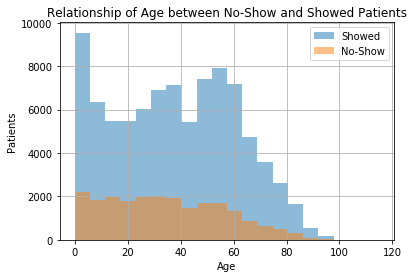

In [17]:
# Visualize age comparison for showed and no-show patients
age_df.Age[showed].hist(alpha=0.5, bins=20, label = 'Showed')
age_df.Age[no_show].hist(alpha = 0.5, bins=20, label = 'No-Show')
plt.title('Relationship of Age between No-Show and Showed Patients')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.legend();

After comparing the relationship between Age and No-Show, I went to gender.

In [18]:
# Create dataframe for gender
gender_df = df.filter(['Gender','No_Show'])

# Prove dataframe was created successfully
gender_df.head()

,Gender,No_Show
0,F,False
1,M,False
2,F,False
3,F,False
4,F,False


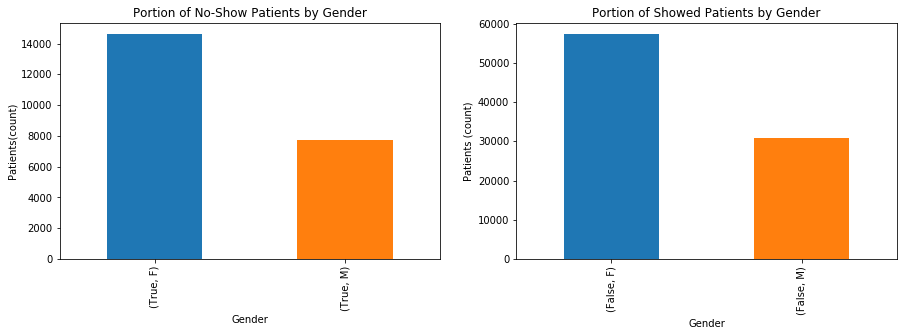

In [19]:
# Create grouping for No-Show Patients based on Gender
gender_showed = gender_df[showed].groupby('No_Show').Gender.value_counts()
gender_no_show = gender_df[no_show].groupby('No_Show').Gender.value_counts()

# Plot compairson of Genders for No-Show patients
fig = plt.figure(figsize=(15,46))

# Showed Graph
plt.subplot(9,2,1)
gender_no_show.plot.bar()
plt.title('Portion of No-Show Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Patients(count)')

# No-Show Graph
plt.subplot(9,2,2)
gender_showed.plot.bar()
plt.title('Portion of Showed Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Patients (count)');

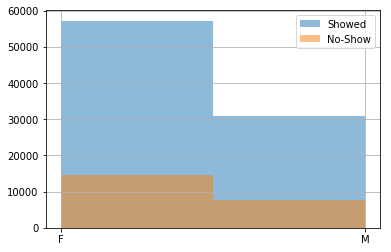

In [20]:
# Direct visual comparison of No-Show to Showed by Gender
gender_df.Gender[showed].hist(alpha=0.5, bins=2, label = 'Showed')
gender_df.Gender[no_show].hist(alpha = 0.5, bins=2, label = 'No-Show')
plt.legend();

In [21]:
# Determien correlations between Gender and No-Show

### Did SMS notifications lead to fewer no-show patients?

In [22]:
# Create dataframe for SMS and No-Show comparison
sms_df = df.filter(['SMS_Received', 'No_Show'])

# Prove dataframe was created successfully
sms_df.head()

,SMS_Received,No_Show
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


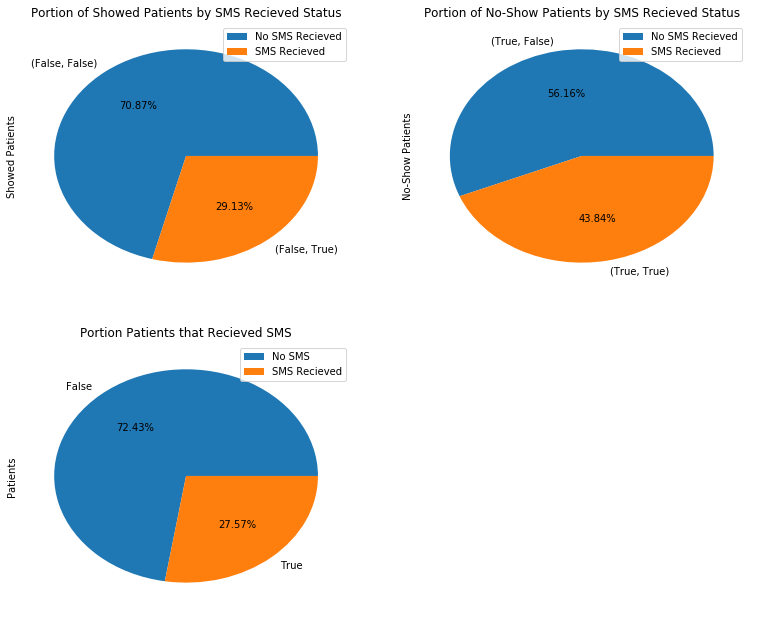

In [25]:
# Seperate data into SMS Received and SMS Not Received
sms_showed = sms_df[showed].groupby('No_Show').SMS_Received.value_counts()
sms_no_show = sms_df[no_show].groupby('No_Show').SMS_Received.value_counts()

sms_overall = sms_df.groupby('No_Show').SMS_Received.sum()

# Plot two sets of data
fig = plt.figure(figsize=(13,52))

# Showed Graph
plt.subplot(9,2,1)
sms_showed.plot.pie(autopct='%.2f%%')
plt.title('Portion of Showed Patients by SMS Recieved Status')
plt.ylabel('Showed Patients')
plt.legend(['No SMS Recieved', 'SMS Recieved'])
    
#No-Show Graph
plt.subplot(9,2,2)
sms_no_show.plot.pie(autopct='%.2f%%')
plt.title('Portion of No-Show Patients by SMS Recieved Status')
plt.ylabel('No-Show Patients')
plt.legend(['No SMS Recieved', 'SMS Recieved'])


#No-Show Graph
plt.subplot(9,2,3)
sms_overall.plot.pie(autopct='%.2f%%')
plt.title('Portion Patients that Recieved SMS')
plt.ylabel('Patients')
plt.legend(['No SMS', 'SMS Recieved']);

<a id='conclusions'></a>
## Conclusions
After exploring the data, I concluded that age and gender between no-show and showed patients had no impact on whether a pateint is a no-show. This is due to the fact that there is no significnat difference between the data and visual reprentation of age or gender compared to no-show and showed pateints. 

I did find that a greater percentage of no-show pateints recieved a SMS Notification than the overall and showed patents sample. This leads me to conclude that the SMS notification, compared to the overal and showed pateints, did not help get pateints to attend their appointments.


I believe there are lurking variables that affect this data set. Since the legal driving age in Brazil is 18, this may have an impact on the ability of those under 18 to attend their appointments if they depened on a guardian for transporation. The same can be applied to those who may be physically impared like the handicap and a portion of elderly patients.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0